# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Решение:** Обозначим за $W_i$ события "Алгоритм $b_i$ допускает ошибку", а за $W$ - "Композиция алгоритмов дает неправильный ответ".

1. Вероятность ошибки композиции равна вероятности того, что хотя бы два из алгоритмов $b_i$ ошиблись, т. к. для $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$ выполняется неравенство треугольника.
$$P(W) = P(\sum_{i=1}^3[W_i]\geq 2) = P(\sum_{i=1}^3[W_i] = 2) + P(\sum_{i=1}^3[W_i] = 3) = 3p^2(1-p) + p^3 = 3p^2 - 2p^3.$$

2. Вероятность ошибки композиции равна вероятности того, что ошибся алгоритм $b_2$, независимо от алгоритмов $b_1$ и $b_3$, т. к. $0.5 > 0.2 + 0.2$.
$$P(W) = P(W_2) = p.$$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

**Решение:** $$ g_i(z_i) = \frac{\partial{L(y_i, z_i)}}{\partial{z_i}} = -\frac{y_i}{z_i} + \frac{1-y_i}{1-z_i} = \frac{z_i-y_i}{z_i(1-z_i)}, $$ где $g_i(z_i)$ - компонента вектора градиента. Распишем рекуррентные формулы из алгоритма градиентного бустинга:

1. Инициализация: Обозначим за $u_{i,0}$ начальные приближения композиции(заметим, что их нельзя положить нулями, как это делается по дефолту, потому что в таком случае не будет определен вектор градиента.

2. Градиентный шаг: Пусть известны $u_{i,t-1}$. Тогда $u_{i,t} = u_{i,t-1} + \alpha_{t}\cdot b_{t}.$ 
    
    2.1. $b_t$ вычисляется как: $$b_t = \underset{b \in B}{\mathrm{argmin}} \sum_{i=1}^{l}{(b(x_i) + g(u_{i, t-1}))^2} = \underset{b \in B}{\mathrm{argmin}} \sum_{i=1}^{l}{(b(x_i) + \frac{u_{i,t-1}-y_i}{u_{i,t-1}\cdot (1-u_{i,t-1})})^2}.$$
    2.2 Далее, вычислим $\alpha_{t}$ (обычная задача одномерной оптимизации): $$\alpha_{t} = \underset{\alpha}{\mathrm{argmin}} \sum_{i=1}^{l} L(y_i, u_{i,t-1}+\alpha \cdot b_t(x_i)).$$
    
3. Закончим процесс либо на заранее заданном номере итерации T, либо когда алгоритмы сойдутся.

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

**Решение:** AdaBoost - частный случай градиентного бустинга с экспоненциальной функцией потерь $L(y,z) = e^{-zy}.$ Будем строить классификатор $$H(x) = sign(f(x)) = sign(\sum_{t=1}^{T} {\alpha_{t}h_{t}}),$$ где $h_t$ - базовые классификаторы, $\alpha_{t}$ - вес $t$-го классификатора, $T$ - некоторый порог. Алгоритм такой:

1. Инициализация: $D_{1}(i) = \frac{1}{l}, \forall i \in [1..l].$

2. $\forall t \in [1..T]:$
    
    2.1. Строим текущий базовый алгоритм: $$h_{t} = \underset{h \in H}{\mathrm{argmin}} \sum_{i=1}^{l} {D_{t}(i)\cdot [y_{i} \neq h(x_i)]}.$$
    
    2.2. Обновляем веса: $$\alpha_{t} = \frac{1}{2} \ln {\frac{1 - \epsilon_{t}}{\epsilon_{t}}},$$ где $$\epsilon_{t} = \sum_{i=1}^{l} {D_{t}(i)\cdot [y_{i} \neq h_{t}(x_i)]}$$
    
    2.3. Обновляем значения $D:$ $$D_{t+1}(i) = \frac{D_{t}(i)e^{-\alpha_{t}y_{i}h_{t}(x_{i})}}{\sum_{j=1}^{l} {D_{t}(j)e^{-\alpha_{t}y_{j}h_{t}(x_{j})}}}.$$
    
Если на $n$-й итерации базовый классификатор $h_{n}$ допускал ошибку только на объекте $x_{j},$ то: $$\epsilon_{n} = \sum_{i=1}^{l} {D_{n}(i)\cdot [y_{i} \neq h_{n}(x_i)]} = D_{n}(j),$$
$$\alpha_{n} = \frac{1}{2} \ln {\frac{1 - \epsilon_{n}}{\epsilon_{n}}} = \frac{1}{2} \ln {\frac{1 - D_{n}(j)}{D_{n}(j)}},$$ наконец,
$$D_{n+1}(j) = \frac{D_{n}(j)e^{-\alpha_{n}y_{j}h_{n}(x_{j})}}{\sum_{k=1}^{l} {D_{n}(k)e^{-\alpha_{n}y_{k}h_{n}(x_{k})}}} = \frac{D_{n}(j)e^{\alpha_{n}}}{\sum_{k=1, k \neq j}^{l} {D_{n}(k)e^{-\alpha_{n}}} + D_{n}(j)e^{\alpha_{n}}} = \frac{D_{n}(j)e^{\frac{1}{2} \ln {\frac{1 - D_{n}(j)}{D_{n}(j)}}}}{\sum_{k=1, k \neq j}^{l} {D_{n}(k)e^{-\frac{1}{2} \ln {\frac{1 - D_{n}(j)}{D_{n}(j)}}}} + D_{n}(j)e^{\frac{1}{2} \ln {\frac{1 - D_{n}(j)}{D_{n}(j)}}}} =$$ $$= \frac{D_{n}(j)(\frac{1-D_{n}(j)}{D_{n}(j)})^{\frac{1}{2}}}{\sum_{k=1, k \neq j}^{l} {D_{n}(k)(\frac{1-D_{n}(j)}{D_{n}(j)})^{\frac{-1}{2}}} + D_{n}(j)(\frac{1-D_{n}(j)}{D_{n}(j)})^{\frac{1}{2}}} = \frac{1-D_{n}(j)}{D_{n}(j)} \cdot \frac{D_{n}(j)}{\sum_{k=1, k \neq j}^{l} {D_{n}(k)} + D_{n}(j)\cdot \frac{1-D_{n}(j)}{D_{n}(j)}} $$$$= \frac{1-D_{n}(j)}{D_{n}(j)} \cdot \frac{D_{n}(j)}{1 - D_{n}(j) + D_{n}(j)\cdot \frac{1-D_{n}(j)}{D_{n}(j)}} = \frac{1-D_{n}(j)}{2\cdot (1-D_{n}(j))} = \frac{1}{2}.$$

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [206]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [207]:
def bagging(X, y):
    indices = np.random.choice(a=X.shape[0], size=X.shape[0], replace=True)
    sample_X, sample_y = X[indices, :], y[indices]
    return sample_X, sample_y

In [208]:
class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees, max_depth=np.inf, max_features=None, criterion='gini'):
        self.num_trees = num_trees
        if max_depth == np.inf:
            self.max_depth = None
        else:
            self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
        
    def build_tree(self):
        tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth, max_features=self.max_features)
        X, y = bagging(self.X, self.y)
        tree.fit(X=X, y=y)
        return tree
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        self.trees = np.empty(self.num_trees, dtype=RandomForest)
        
        for num_tree in range(self.num_trees):
            self.trees[num_tree] = self.build_tree()

        return self
    
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0], dtype=int)
        predictions = np.empty([self.num_trees, X_test.shape[0]], dtype=int)
        for num_tree in range(self.num_trees):
            predictions[num_tree] = self.trees[num_tree].predict(X_test)
        for i in range(y_pred.shape[0]):
            y_pred[i] = np.bincount(predictions[:, i]).argmax()
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [209]:
frame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=
                   ['target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines', 'Proline'])
frame.head()

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [210]:
X, y = frame.as_matrix()[:, 1:], frame.as_matrix()[:, 0].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

In [211]:
%%time
accuracy_scores = np.zeros(201)
for num_trees in range(1, 201):
    rf = RandomForest(num_trees=num_trees)
    rf.fit(X_train, y_train)
    accuracy_scores[num_trees] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 13.3 s, sys: 0 ns, total: 13.3 s
Wall time: 13.3 s


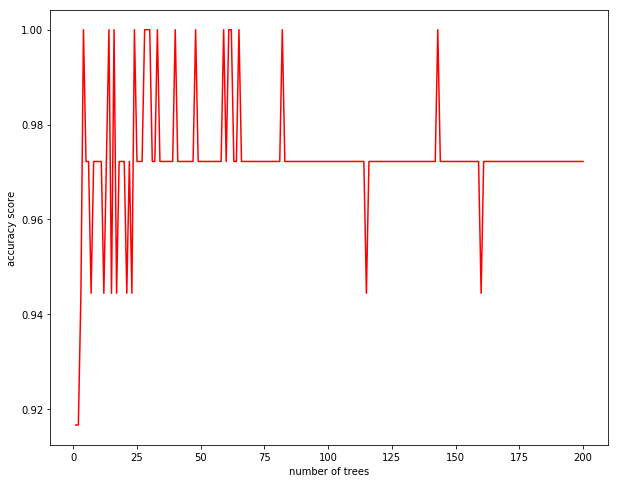

In [213]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, accuracy_scores.shape[0]), accuracy_scores[1:], color='red')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.show()

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

In [214]:
%%time
new_accuracy_scores = np.zeros(201)
for num_trees in range(1, 201):
    rf = RandomForestClassifier(n_estimators=num_trees)
    rf.fit(X_train, y_train)
    new_accuracy_scores[num_trees] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 34.8 s, sys: 128 ms, total: 34.9 s
Wall time: 34.9 s


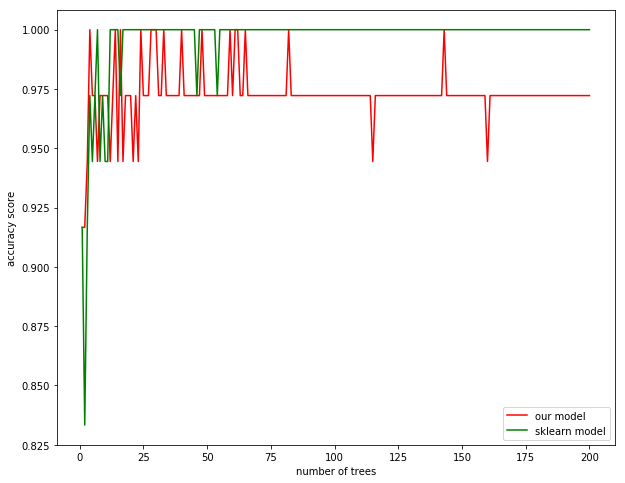

In [216]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, accuracy_scores.shape[0]), accuracy_scores[1:], color='red', label='our model')
plt.plot(range(1, new_accuracy_scores.shape[0]), new_accuracy_scores[1:], color='green', label='sklearn model')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

**Вывод:** Если не использовать бэггинг, построенная модель уступает в качестве классическому случайному лесу, но работает быстрее в два раза. По графикам видно, что в целом с увеличением числа деревьев точность предсказаний повышается и сходится. Лес чувствителен к шумам, этим можно объяснить немонотонность нашего графика. Далее будем использовать бэггинг с параметром max_features = 'sqrt', т. к. это наиболее эмпирически качественное значение для задачи классификации.

In [217]:
%%time
accuracy_scores = np.zeros(201)
for num_trees in range(1, 201):
    rf = RandomForest(num_trees=num_trees, max_features='sqrt')
    rf.fit(X_train, y_train)
    accuracy_scores[num_trees] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 9.19 s, sys: 0 ns, total: 9.19 s
Wall time: 9.19 s


In [218]:
%%time
new_accuracy_scores = np.zeros(201)
for num_trees in range(1, 201):
    rf = RandomForestClassifier(n_estimators=num_trees, max_features='sqrt')
    rf.fit(X_train, y_train)
    new_accuracy_scores[num_trees] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 29.3 s, sys: 11.9 ms, total: 29.3 s
Wall time: 29.3 s


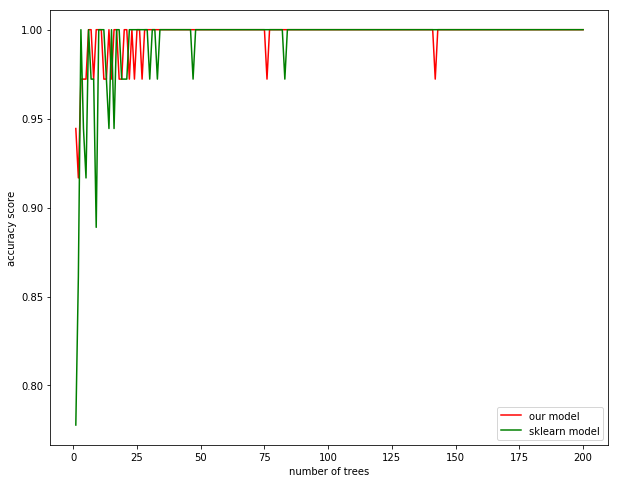

In [219]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, accuracy_scores.shape[0]), accuracy_scores[1:], color='red', label='our model')
plt.plot(range(1, new_accuracy_scores.shape[0]), new_accuracy_scores[1:], color='green', label='sklearn model')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

**Вывод:** С добавлением бэггинга в модель качество предсказаний заметно увеличилось и стало приблизительно равным качеству на sklearn, т. к. теперь базовые деревья стали "независимее" и "различнее". При этом скорость сходимости гораздо выше и модель все еще работает заметно быстрее.

**Замечание:** Из-за маленького размера тестовой выборки значения accuracy_score сильно дискретизированы, для большей наглядности будем запускать наш лес несколько раз и усреднять результаты.

In [220]:
%%time
accuracy_scores = np.zeros([101, 10])
for num_trees in range(1, 101):
    for i in range(10):
        rf = RandomForest(num_trees=num_trees, max_features='sqrt')
        rf.fit(X_train, y_train)
        accuracy_scores[num_trees, i] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 22.6 s, sys: 12 ms, total: 22.6 s
Wall time: 22.6 s


In [221]:
%%time
new_accuracy_scores = np.zeros([101, 10])
for num_trees in range(1, 101):
    for i in range(10):
        rf = RandomForestClassifier(n_estimators=num_trees, max_features='sqrt')
        rf.fit(X_train, y_train)
        new_accuracy_scores[num_trees, i] = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))

CPU times: user 1min 20s, sys: 7.89 ms, total: 1min 20s
Wall time: 1min 20s


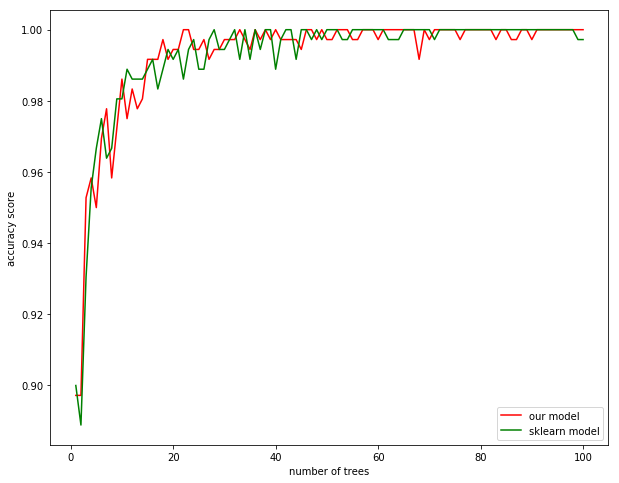

In [222]:
mean_accuracy_scores = np.mean(accuracy_scores, axis=1)
mean_new_accuracy_scores = np.mean(new_accuracy_scores, axis=1)

plt.figure(figsize=(10, 8))
plt.plot(range(1, mean_accuracy_scores.shape[0]), mean_accuracy_scores[1:], color='red', label='our model')
plt.plot(range(1, mean_new_accuracy_scores.shape[0]), mean_new_accuracy_scores[1:], color='green', label='sklearn model')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [223]:
def random_subspace_method(length, size=None):
    if size is None:
        return np.random.choice(a=range(length), size=length, replace=False)
    elif size == 'sqrt':
        return np.random.choice(a=range(length), size=int(np.sqrt(length)), replace=False)
    elif size == 'sqrt':
        return np.random.choice(a=range(length), size=int(np.sqrt(length)), replace=False)
    elif size == 'log2':
        return np.random.choice(a=range(length), size=int(np.log2(length)), replace=False)
    elif type(size) == int:
        return np.random.choice(a=range(length), size=size, replace=False)
    elif type(size) == float:
        return np.random.choice(a=range(length), size=int(size*length), replace=False)

In [224]:
class NewRandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees, max_depth=np.inf, max_features=None, criterion='gini'):
        self.num_trees = num_trees
        if max_depth == np.inf:
            self.max_depth = None
        else:
            self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
        
    def build_tree(self):
        tree = DecisionTreeClassifier(criterion=self.criterion, max_depth=self.max_depth)
        X, y = bagging(self.X, self.y)
        features = random_subspace_method(length=self.X[0].shape[0], size=self.max_features)
        tree.fit(X=X[:, features], y=y)
        return [tree, features]
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        self.trees = np.empty(self.num_trees, dtype=RandomForest)
        
        for num_tree in range(self.num_trees):
            self.trees[num_tree] = self.build_tree()

        return self
    
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0], dtype=int)
        predictions = np.empty([self.num_trees, X_test.shape[0]], dtype=int)
        for num_tree in range(self.num_trees):
            predictions[num_tree] = self.trees[num_tree][0].predict(X_test[:, self.trees[num_tree][1]])
        for i in range(y_pred.shape[0]):
            y_pred[i] = np.bincount(predictions[:, i]).argmax()
        return y_pred

In [225]:
%%time
accuracy_scores_rf_old = np.zeros([101, 10])
accuracy_scores_rf_new = np.zeros([101, 10])
accuracy_scores_sklearn_rf = np.zeros([101, 10])
scores = [accuracy_scores_rf_old, accuracy_scores_rf_new, accuracy_scores_sklearn_rf]
for num_trees in range(1, 101):
    for i in range(10):
        rf_old = RandomForest(num_trees=num_trees, max_features='sqrt')
        rf_new = NewRandomForest(num_trees=num_trees, max_features='sqrt')
        rf_sklearn = RandomForestClassifier(n_estimators=num_trees, max_features='sqrt')
        rfs = [rf_old, rf_new, rf_sklearn]
        for j in range(3):
            rfs[j].fit(X_train, y_train)
            scores[j][num_trees, i] = accuracy_score(y_true=y_test, y_pred=rfs[j].predict(X_test))

CPU times: user 2min 16s, sys: 7.87 ms, total: 2min 16s
Wall time: 2min 16s


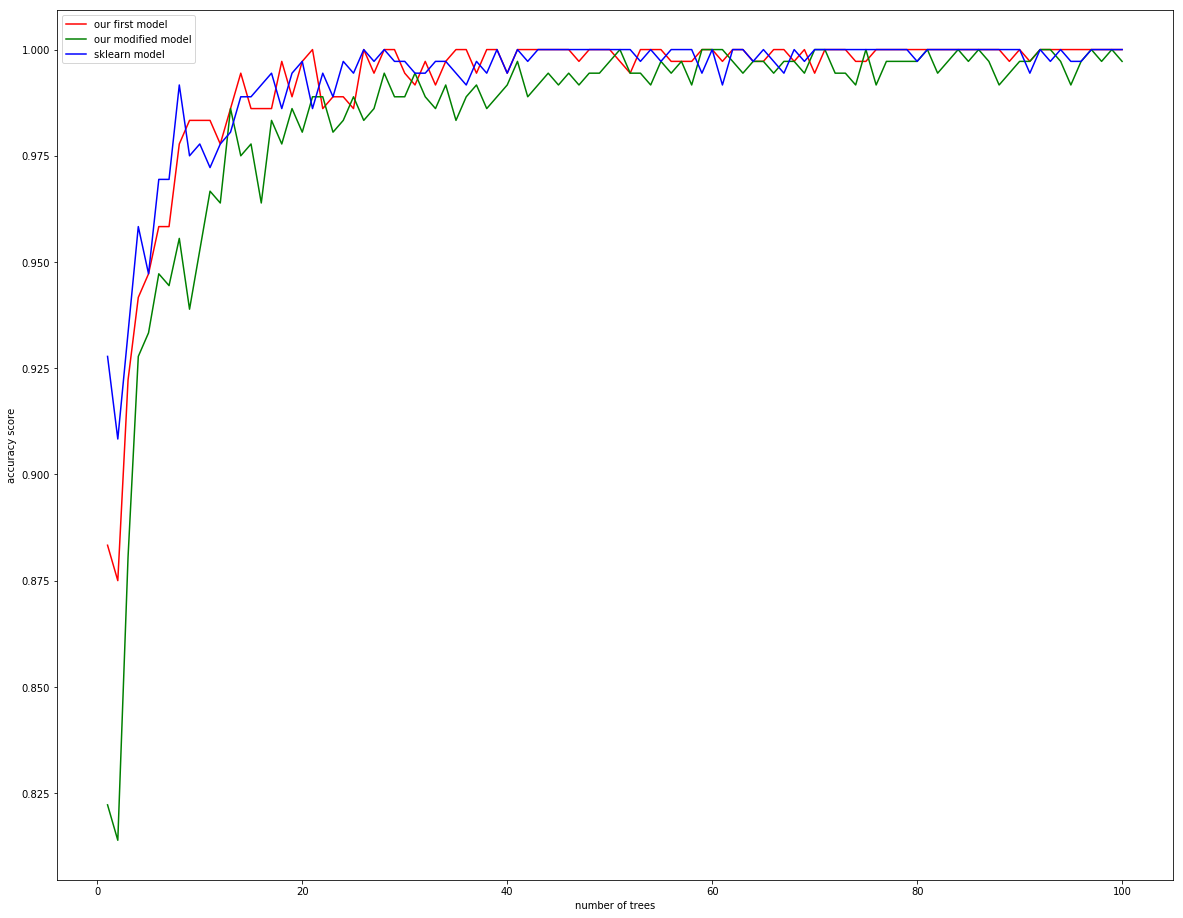

In [226]:
mean_scores = np.empty(3, dtype=object)
for j in range(3):
    mean_scores[j] = np.mean(scores[j], axis=1)

plt.figure(figsize=(20, 16))
plt.plot(range(1, mean_scores[0].shape[0]), mean_scores[0][1:], color='red', label='our first model')
plt.plot(range(1, mean_scores[1].shape[0]), mean_scores[1][1:], color='green', label='our modified model')
plt.plot(range(1, mean_scores[2].shape[0]), mean_scores[2][1:], color='blue', label='sklearn model')
plt.xlabel('number of trees')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

**Вывод:** Как можно наблюдать на графике, модификация нашего леса не привела ни к чему хорошему, качество заметно снизилось. Это обусловлено тем, что если мы заранее выбираем признаки для базового дерева, то ухудшается качество предсказаний самого дерева. Тем не менее, с ростом количества деревьев рост качества сохранился.